Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "skkali"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [3]:
def error(M1, dM1, M2, dM2, r, dr):
    # YOUR CODE HERE
    G = 6.67384 * 10 ** (-11)
    F = G * M1 * M2 / r ** 2
    sigma = F * np.sqrt((dM1 / M1) ** 2 + (dM2 / M2) ** 2 + (2 * dr / r) ** 2)
    #raise NotImplementedError()
    return F, sigma

In [4]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639265)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

In [5]:
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    # YOUR CODE HERE
    m1 = np.random.normal(M1, dM1, n)
    m2 = np.random.normal(M2, dM2, n)
    r = np.random.normal(r, dr, n)
    f, g = np.zeros(n), 6.67384 * 10 ** (-11)
    for i in range(n):
        f[i] = (g * m1[i] * m2[i]) / (r[i] ** 2)
    

    weight, bins = np.histogram(f, 100, density=True)

    plt.hist(bins[:-1], 100, weights=weight)
    #plt.show()
    #raise NotImplementedError()

# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

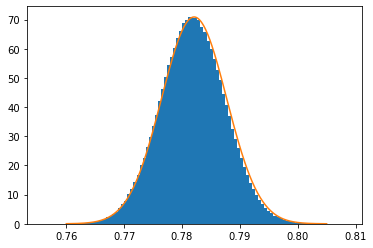

In [6]:
MonteCarloNormal(40 * 10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
f, sigma = error(40 * 10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
x, y = np.linspace(0.76,0.805, num = 500), np.zeros(500)
for i in range(500):
    y[i] = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-1 * (x[i] - f)**2 / (2 * sigma**2))
plt.plot(x,y)
#raise NotImplementedError()

Сделайте вывод о согласованности двух подходов.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

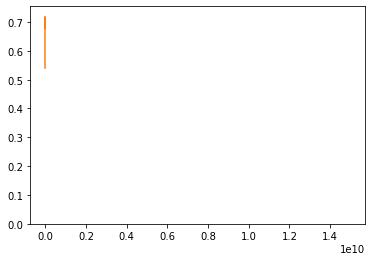

In [8]:
# YOUR CODE HERE
MonteCarloNormal(40 * 10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
F, sigma = error(40 * 10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
x, y = np.linspace(0.6,1.2, num = 500), np.zeros(500)
for i in range(500):
    y[i] = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-1 * (x[i] - F)**2 / (2 * sigma**2))
plt.plot(x,y)
#plt.show()
#raise NotImplementedError()
#Идейно я понимаю, что нужно сделать, но как это написать через код я без понятия. Спасибо за внимание!

# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

YOUR ANSWER HERE 


In [63]:
Метод Монте-Карло точнее, это можно увидеть сравнив задания 1.3 и 2.1, во втором задании отклонения от среднего значения 
слишком большие (в связи с чем возникают трудности построения графика)

SyntaxError: invalid syntax (3063147798.py, line 1)